<a href="https://colab.research.google.com/github/JNario31/DimensionReductionAlgorithms/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# download MNIST data

!gdown --folder https://drive.google.com/drive/folders/1r20aRjc2iu9O3kN3Xj9jNYY2uMgcERY1 2> /dev/null

#install python_mnist

!pip install python_mnist

Processing file 1Jf2XqGR7y1fzOZNKLJiom7GmZZUzXhfs t10k-images-idx3-ubyte
Processing file 1qiYu9dW3ZNrlvTFO5fI4qf8Wtr8K-pCu t10k-labels-idx1-ubyte
Processing file 1SnWvBcUETRJ53rEJozFUUo-hOQFPKxjp train-images-idx3-ubyte
Processing file 1kKEIi_pwVHmabByAnwZQsaMgro9XiBFE train-labels-idx1-ubyte


In [2]:
#load MINST training images

from mnist import MNIST
import numpy as np

mnist_loader = MNIST('MNIST')
train_data, train_label = mnist_loader.load_training()

train_data = np.array(train_data)
train_label = np.array(train_label)

print(train_data.shape)
print(train_label.shape)

(60000, 784)
(60000,)


In [13]:
import numpy as np

# extract three digits '4', '7', '8'
digit_index = np.logical_or(train_label == 4, train_label == 7)
digit_index = np.logical_or(digit_index, train_label == 8)
X = train_data[digit_index]
y = train_label[digit_index]

print(X.shape)
print(y.shape)

(17958, 784)
(17958,)


(17958, 2)


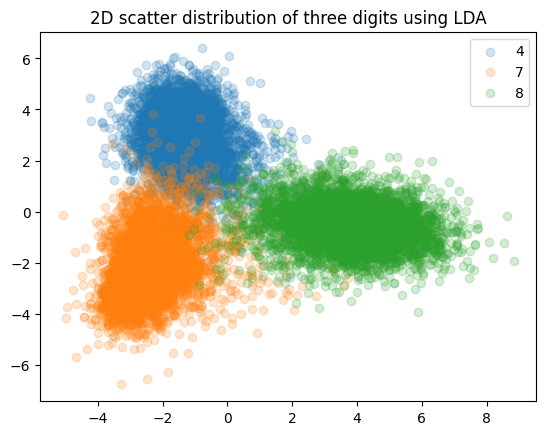

In [14]:
# use the LDA implementation in scikit-learn to project data to 2-d space
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)

print(X_lda.shape)

X4 = X_lda[y == 4]
X7 = X_lda[y == 7]
X8 = X_lda[y == 8]

plt.title('2D scatter distribution of three digits using LDA')
plt.scatter(x=X4[:, 0], y=X4[:, 1], color='#1f77b4', alpha=0.20, label='4')
plt.scatter(x=X7[:, 0], y=X7[:, 1],  color='#ff7f0e', alpha=0.20, label='7')
plt.scatter(x=X8[:, 0], y=X8[:, 1], color='#2ca02c', alpha=0.20, label='8')
plt.legend(['4', '7', '8'])